# Assignment 3
Name: Kesar Shrivastava

Roll number: 2019051

# Question 1

# (a)

All the itemsets in the dataframe are arranged in decreasing order of their support values.

Higher support values indicate high presence of the itemset in the different recipes.

In [169]:
pip install apyori

In [170]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import random
import copy
import operator
import ast
from apyori import apriori

In [171]:
# reading the json file
df = pd.read_json("train.json")
df_ingredients = df['ingredients'].tolist()

In [172]:
# creating the ingredients basket to get the number of ingredients
ingredient_basket = []
for ingredient_list in df_ingredients:
  for ingredient in ingredient_list:
    if ingredient in ingredient_basket:
      pass
    else:
      ingredient_basket.append(ingredient)

print("Number of unique ingredients: ", len(ingredient_basket))

Number of unique ingredients:  6714


In [173]:
# Defining required functions

# This function finds support value of a record in a result in apriori
def find_supportValue(result):
  s = str(result)
  i1 = s.find('support')
  i2 = s.find(',',i1)
  val = float(s[i1+8:i2])
  return val

# This gives the ingredients in the result of apriori
def get_ingredient(result):
  s = str(result)
  i1 = s.find('frozenset')
  i2 = s.find('support')
  return s[i1+10:i2-3]

# helper function to create the dataframe of the output of apriori
def create_df(result):
  _df = {'Ingredient':[],'Support Value':[]}
  for record in result:
    _df['Ingredient'].append(get_ingredient(record))
    _df['Support Value'].append(find_supportValue(record))
  _df = pd.DataFrame(_df)
  return _df

# this gives the itemset of desired size slicing out the itemsets of less sizes
def get_itemset(result,size):
  _result = copy.deepcopy(result)
  for i in range(len(_result)):
    record = str(_result[i])
    i1 = record.find('frozenset')
    i2 = record.find('support')
    s = record[i1+10:i2-3]
    d = ast.literal_eval(s)
    if len(d)!=size:
      result.remove(_result[i])
  return result

**1-itemsets**

Trying out different support values until we get around five itemsets

In [174]:
results = list(apriori(df_ingredients,min_support=0.001,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  1137
                    Ingredient  Support Value
912                   {'salt'}       0.453764
723                 {'onions'}       0.200432
719              {'olive oil'}       0.200407
1091                 {'water'}       0.187484
475                 {'garlic'}       0.185548
...                        ...            ...
97           {'black vinegar'}       0.001006
1084            {'vermicelli'}       0.001006
789             {'pita bread'}       0.001006
1098  {'white cheddar cheese'}       0.001006
370            {'ear of corn'}       0.001006

[1137 rows x 2 columns]


0.001 support value gives 1137 itemsets. Here we can see that at the end the support value of the itemsets are same. This is because these items are used sparsely. Hence, for the next epoch we will reduce the support value significantly to obtain the itemsets with best support value.

In [175]:
results = list(apriori(df_ingredients,min_support=0.01,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  194
                   Ingredient  Support Value
159                  {'salt'}       0.453764
137                {'onions'}       0.200432
135             {'olive oil'}       0.200407
184                 {'water'}       0.187484
88                 {'garlic'}       0.185548
..                        ...            ...
181       {'vegetable broth'}       0.010283
51   {'cracked black pepper'}       0.010258
172         {'spring onions'}       0.010233
143               {'peanuts'}       0.010208
32              {'chickpeas'}       0.010107

[194 rows x 2 columns]


With support value 0.01, the number of itemsets are significantly reduced. However, reducing it further for best results.

In [176]:
results = list(apriori(df_ingredients,min_support=0.05,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  25
                    Ingredient  Support Value
18                    {'salt'}       0.453764
16                  {'onions'}       0.200432
15               {'olive oil'}       0.200407
24                   {'water'}       0.187484
7                   {'garlic'}       0.185548
20                   {'sugar'}       0.161764
8            {'garlic cloves'}       0.156786
2                   {'butter'}       0.121864
10     {'ground black pepper'}       0.120280
0        {'all-purpose flour'}       0.116458
17                  {'pepper'}       0.111580
23           {'vegetable oil'}       0.110248
5                     {'eggs'}       0.085181
19               {'soy sauce'}       0.082868
12             {'kosher salt'}       0.078267
9             {'green onions'}       0.077387
21                {'tomatoes'}       0.076884
13              {'large eggs'}       0.074119
3                  {'carrots'}       0.070750
22         {'unsalted butter'}       0.069945
11  

Support value 0.05 gives 25 itemsets with quite classic ingredients at the top like salt, onions, water, garlic, and sugar.

In [177]:
results = list(apriori(df_ingredients,min_support=0.1,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  12
                 Ingredient  Support Value
8                  {'salt'}       0.453764
6                {'onions'}       0.200432
5             {'olive oil'}       0.200407
11                {'water'}       0.187484
2                {'garlic'}       0.185548
9                 {'sugar'}       0.161764
3         {'garlic cloves'}       0.156786
1                {'butter'}       0.121864
4   {'ground black pepper'}       0.120280
0     {'all-purpose flour'}       0.116458
7                {'pepper'}       0.111580
10        {'vegetable oil'}       0.110248


Increasing the support value to 0.1 has sliced out many itemsets and left the frequent ingredients. These are the ingredients that have the highest frequency.

In [178]:
results = list(apriori(df_ingredients,min_support=0.15,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  7
          Ingredient  Support Value
4           {'salt'}       0.453764
3         {'onions'}       0.200432
2      {'olive oil'}       0.200407
6          {'water'}       0.187484
0         {'garlic'}       0.185548
5          {'sugar'}       0.161764
1  {'garlic cloves'}       0.156786


Here, we can see the with support value 0.15 we get the most frequent ingredients used in the recipes. These are the ingredients which will occur the most frequently in the association rules that we will generate in part (b)

**2-itemsets**

In [179]:
results = list(apriori(df_ingredients,min_support=0.001,max_length=2))
results = get_itemset(results,2)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  8977
                                             Ingredient  Support Value
7964                                 {'salt', 'onions'}       0.110424
7831                              {'salt', 'olive oil'}       0.105018
8607                                  {'salt', 'water'}       0.099563
8185                                 {'pepper', 'salt'}       0.096646
5661                                 {'salt', 'garlic'}       0.094258
...                                                 ...            ...
7718                                   {'salt', 'nori'}       0.001006
1254  {'boneless skinless chicken breasts', 'ground ...       0.001006
2598                   {'curry powder', 'chili powder'}       0.001006
5331                         {'fresh parsley', 'leeks'}       0.001006
5732               {'sesame oil', 'garlic chili sauce'}       0.001006

[8977 rows x 2 columns]


Setting support value 0.001 gives 8977 itemsets. Their presence in the recipes are rare and hence we need to increase the support value.

In [180]:
results = list(apriori(df_ingredients,min_support=0.005,max_length=2))
results = get_itemset(results,2)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  1042
                                       Ingredient  Support Value
905                            {'salt', 'onions'}       0.110424
885                         {'salt', 'olive oil'}       0.105018
990                             {'salt', 'water'}       0.099563
933                            {'pepper', 'salt'}       0.096646
600                            {'salt', 'garlic'}       0.094258
..                                            ...            ...
556                    {'salt', 'fresh rosemary'}       0.005003
478            {'fish sauce', 'fresh lime juice'}       0.005003
317                         {'sugar', 'cinnamon'}       0.005003
952               {'red bell pepper', 'tomatoes'}       0.005003
687  {'ground black pepper', 'green bell pepper'}       0.005003

[1042 rows x 2 columns]


0.005 support value too does not give the most frequent itemsets. These 2-itemsets do not occur in many recipes given in the dataset.

In [181]:
results = list(apriori(df_ingredients,min_support=0.01,max_length=2))
results = get_itemset(results,2)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  341
                          Ingredient  Support Value
285               {'salt', 'onions'}       0.110424
276            {'salt', 'olive oil'}       0.105018
319                {'salt', 'water'}       0.099563
294               {'pepper', 'salt'}       0.096646
180               {'salt', 'garlic'}       0.094258
..                               ...            ...
326   {'vegetable oil', 'scallions'}       0.010032
269             {'oil', 'soy sauce'}       0.010032
178       {'purple onion', 'garlic'}       0.010032
69   {'cayenne pepper', 'olive oil'}       0.010007
112         {'salt', 'curry powder'}       0.010007

[341 rows x 2 columns]


Here, we get much less itemsets and we can see that many of the itemsets have the most frequent 1-itemsets as their subsets. This is because those were frequent hence their superset too are frequent.

In [182]:
results = list(apriori(df_ingredients,min_support=0.08,max_length=2))
results = get_itemset(results,2)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  5
              Ingredient  Support Value
2     {'salt', 'onions'}       0.110424
1  {'salt', 'olive oil'}       0.105018
4      {'salt', 'water'}       0.099563
3     {'pepper', 'salt'}       0.096646
0     {'salt', 'garlic'}       0.094258


Now, we get the best support. All the sets are permutation and combination of the ingredients found in 1-itemset.

**3-itemsets**

In [183]:
results = list(apriori(df_ingredients,min_support=0.004,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  813
                                            Ingredient  Support Value
493                       {'salt', 'onions', 'garlic'}       0.040353
732                       {'pepper', 'salt', 'onions'}       0.033741
748                        {'salt', 'onions', 'water'}       0.031176
711                    {'salt', 'onions', 'olive oil'}       0.030246
486                    {'olive oil', 'salt', 'garlic'}       0.029793
..                                                 ...            ...
71   {'unsalted butter', 'whole milk', 'all-purpose...       0.004023
695                {'salt', 'minced garlic', 'onions'}       0.004023
692                  {'vegetable oil', 'salt', 'milk'}       0.004023
278           {'salt', 'jalapeno chilies', 'cilantro'}       0.004023
734              {'pepper', 'vegetable oil', 'onions'}       0.004023

[813 rows x 2 columns]


0.004 support value does not give the top itemsets. We need to increase the support for the next epoch.

In [184]:
results = list(apriori(df_ingredients,min_support=0.009,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  136
                                            Ingredient  Support Value
72                        {'salt', 'onions', 'garlic'}       0.040353
118                       {'pepper', 'salt', 'onions'}       0.033741
124                        {'salt', 'onions', 'water'}       0.031176
112                    {'salt', 'onions', 'olive oil'}       0.030246
70                     {'olive oil', 'salt', 'garlic'}       0.029793
..                                                 ...            ...
115           {'red bell pepper', 'salt', 'olive oil'}       0.009127
131                 {'sugar', 'salt', 'vegetable oil'}       0.009127
5    {'unsalted butter', 'baking powder', 'all-purp...       0.009101
25                   {'baking powder', 'salt', 'eggs'}       0.009076
55                          {'salt', 'onions', 'eggs'}       0.009026

[136 rows x 2 columns]


Here, we can see that even after increasing the support value the number of itemsets does not decrease much due to the size of itemsets.

In [185]:
results = list(apriori(df_ingredients,min_support=0.01,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  95
                                          Ingredient  Support Value
51                      {'salt', 'onions', 'garlic'}       0.040353
84                      {'pepper', 'salt', 'onions'}       0.033741
88                       {'salt', 'onions', 'water'}       0.031176
79                   {'salt', 'onions', 'olive oil'}       0.030246
49                   {'olive oil', 'salt', 'garlic'}       0.029793
..                                               ...            ...
94              {'sugar', 'soy sauce', 'sesame oil'}       0.010107
28                   {'butter', 'salt', 'olive oil'}       0.010082
68    {'ground black pepper', 'onions', 'olive oil'}       0.010057
56                       {'sugar', 'salt', 'garlic'}       0.010057
12  {'salt', 'vanilla extract', 'all-purpose flour'}       0.010007

[95 rows x 2 columns]


Here, also the frequent ingredients are the combination of the topmost 1-itemsets.

In [186]:
results = list(apriori(df_ingredients,min_support=0.02,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  16
                                        Ingredient  Support Value
6                     {'salt', 'onions', 'garlic'}       0.040353
14                    {'pepper', 'salt', 'onions'}       0.033741
15                     {'salt', 'onions', 'water'}       0.031176
12                 {'salt', 'onions', 'olive oil'}       0.030246
5                  {'olive oil', 'salt', 'garlic'}       0.029793
7                     {'pepper', 'salt', 'garlic'}       0.029416
13                 {'pepper', 'salt', 'olive oil'}       0.029265
9           {'garlic cloves', 'salt', 'olive oil'}       0.028411
3           {'sugar', 'salt', 'all-purpose flour'}       0.023986
11    {'salt', 'ground black pepper', 'olive oil'}       0.023960
8                      {'salt', 'water', 'garlic'}       0.023608
1          {'butter', 'salt', 'all-purpose flour'}       0.023483
0   {'baking powder', 'salt', 'all-purpose flour'}       0.021924
10             {'salt', 'garlic cloves', 'onio

With 0.02 support value we get the most frequent combination of the ingredients used in the recipes. These combination are the classic ingredients used frequently in the many recipes.

In [187]:
results = list(apriori(df_ingredients,min_support=0.03,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  4
                        Ingredient  Support Value
0     {'salt', 'onions', 'garlic'}       0.040353
2     {'pepper', 'salt', 'onions'}       0.033741
3      {'salt', 'onions', 'water'}       0.031176
1  {'salt', 'onions', 'olive oil'}       0.030246


For this support value we get the most frequent 3-itemsets. We will create association rules for these itemsets which will tell the confidence of the ingredients getting used in the recipe if other related ingredients are getting used.

**4-itemsets**

In [188]:
results = list(apriori(df_ingredients,min_support=0.006,max_length=4))
results = get_itemset(results,4)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  34
                                           Ingredient  Support Value
19             {'pepper', 'salt', 'onions', 'garlic'}       0.014105
21              {'salt', 'onions', 'water', 'garlic'}       0.012621
17          {'olive oil', 'salt', 'onions', 'garlic'}       0.012244
18          {'pepper', 'olive oil', 'salt', 'garlic'}       0.010685
30          {'pepper', 'salt', 'onions', 'olive oil'}       0.010359
3   {'sugar', 'baking powder', 'salt', 'all-purpos...       0.010007
8   {'sugar', 'salt', 'large eggs', 'all-purpose f...       0.009831
32              {'pepper', 'salt', 'onions', 'water'}       0.009252
11  {'sugar', 'unsalted butter', 'salt', 'all-purp...       0.008850
9   {'unsalted butter', 'salt', 'large eggs', 'all...       0.008071
20           {'tomatoes', 'salt', 'onions', 'garlic'}       0.007568
1   {'baking powder', 'butter', 'salt', 'all-purpo...       0.007568
16  {'salt', 'ground black pepper', 'onions', 'gar...       0.007467
0   

Here, 34 itemsets are created with less support value. Reason lies in the infrequency of use of the ingredients together.

In [189]:
results = list(apriori(df_ingredients,min_support=0.008,max_length=4))
results = get_itemset(results,4)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  10
                                          Ingredient  Support Value
6             {'pepper', 'salt', 'onions', 'garlic'}       0.014105
7              {'salt', 'onions', 'water', 'garlic'}       0.012621
4          {'olive oil', 'salt', 'onions', 'garlic'}       0.012244
5          {'pepper', 'olive oil', 'salt', 'garlic'}       0.010685
8          {'pepper', 'salt', 'onions', 'olive oil'}       0.010359
0  {'sugar', 'baking powder', 'salt', 'all-purpos...       0.010007
1  {'sugar', 'salt', 'large eggs', 'all-purpose f...       0.009831
9              {'pepper', 'salt', 'onions', 'water'}       0.009252
3  {'sugar', 'unsalted butter', 'salt', 'all-purp...       0.008850
2  {'unsalted butter', 'salt', 'large eggs', 'all...       0.008071


Increasing the support value a little bit slices out many itemsets and gives us the frequent itemsets.

In [190]:
results = list(apriori(df_ingredients,min_support=0.01,max_length=4))
results = get_itemset(results,4)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  6
                                          Ingredient  Support Value
3             {'pepper', 'salt', 'onions', 'garlic'}       0.014105
4              {'salt', 'onions', 'water', 'garlic'}       0.012621
1          {'olive oil', 'salt', 'onions', 'garlic'}       0.012244
2          {'pepper', 'olive oil', 'salt', 'garlic'}       0.010685
5          {'pepper', 'salt', 'onions', 'olive oil'}       0.010359
0  {'sugar', 'baking powder', 'salt', 'all-purpos...       0.010007


0.01 acts as the best support as gives us the topmost itemsets.

**5-itemsets**

In [191]:
results = list(apriori(df_ingredients,min_support=0.003,max_length=5))
results = get_itemset(results,5)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  11
                                           Ingredient  Support Value
9   {'pepper', 'garlic', 'salt', 'onions', 'olive ...       0.004827
7   {'salt', 'unsalted butter', 'sugar', 'large eg...       0.004651
3   {'salt', 'baking powder', 'sugar', 'large eggs...       0.004551
10    {'pepper', 'salt', 'onions', 'water', 'garlic'}       0.004324
5   {'salt', 'unsalted butter', 'baking powder', '...       0.003972
1   {'salt', 'all-purpose flour', 'baking powder',...       0.003671
0   {'salt', 'all-purpose flour', 'baking powder',...       0.003646
2   {'salt', 'butter', 'baking powder', 'sugar', '...       0.003419
8   {'salt', 'vanilla extract', 'sugar', 'large eg...       0.003294
4   {'salt', 'baking powder', 'unsalted butter', '...       0.003118
6   {'salt', 'butter', 'sugar', 'large eggs', 'all...       0.003092


Since we have incresed the size of the itemsets, a small support value too gives much less itemsets. This is because the probability of five ingredients getting used in more than one recipe is not so frequent.

In [192]:
results = list(apriori(df_ingredients,min_support=0.004,max_length=5))
results = get_itemset(results,5)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  4
                                          Ingredient  Support Value
2  {'pepper', 'garlic', 'salt', 'onions', 'olive ...       0.004827
1  {'salt', 'unsalted butter', 'sugar', 'large eg...       0.004651
0  {'salt', 'baking powder', 'sugar', 'large eggs...       0.004551
3    {'pepper', 'salt', 'onions', 'water', 'garlic'}       0.004324


Support value of 0.004 gives the best support value and most frequent 5-itemsets.

# (b)

**1-itemset**

As seen from (a) **0.18** gives us the top 5 itemsets.

The itemsets are

*   salt
*   onions
*   olive oil
*   water
*   garlic







In [193]:
results = list(apriori(df_ingredients,min_support = 0.18,max_length = 1))
results

[RelationRecord(items=frozenset({'garlic'}), support=0.18554834816714436, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'garlic'}), confidence=0.18554834816714436, lift=1.0)]),
 RelationRecord(items=frozenset({'olive oil'}), support=0.20040730125207423, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'olive oil'}), confidence=0.20040730125207423, lift=1.0)]),
 RelationRecord(items=frozenset({'onions'}), support=0.2004324433046714, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'onions'}), confidence=0.2004324433046714, lift=1.0)]),
 RelationRecord(items=frozenset({'salt'}), support=0.45376376527379697, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'salt'}), confidence=0.45376376527379697, lift=1.0)]),
 RelationRecord(items=frozenset({'water'}), support=0.18748428621712676, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=froz

**2-itemset**

**0.08** is the best support to give the top 5 itemsets



*   salt, onions
*   salt, olive oil
* salt, water
* pepper, salt
* salt, garlic


In [194]:
results = list(apriori(df_ingredients,min_support = 0.08,max_length = 2))
results = get_itemset(results,2)
results

[RelationRecord(items=frozenset({'salt', 'garlic'}), support=0.09425755518680545, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'salt', 'garlic'}), confidence=0.09425755518680545, lift=1.0), OrderedStatistic(items_base=frozenset({'garlic'}), items_add=frozenset({'salt'}), confidence=0.5079945799457996, lift=1.119513321296777), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'garlic'}), confidence=0.2077238475177305, lift=1.1195133212967767)]),
 RelationRecord(items=frozenset({'salt', 'olive oil'}), support=0.10501835369839593, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'salt', 'olive oil'}), confidence=0.10501835369839593, lift=1.0), OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'salt'}), confidence=0.5240245891356166, lift=1.1548400935438836), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'olive oil'}), confidence=0.23143838652482268, li

**3-itemset**

**0.0297** best support value


* salt, onions, garlic
* pepper, salt, onions
* salt, onions, water
* salt, onions, olive oil
* olive oil, salt, garlic

In [195]:
results = list(apriori(df_ingredients,min_support = 0.0297,max_length = 3))
results = get_itemset(results,3)
results

[RelationRecord(items=frozenset({'olive oil', 'salt', 'garlic'}), support=0.029793332327651228, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'garlic', 'salt', 'olive oil'}), confidence=0.029793332327651228, lift=1.0), OrderedStatistic(items_base=frozenset({'garlic'}), items_add=frozenset({'salt', 'olive oil'}), confidence=0.16056910569105692, lift=1.5289623197883884), OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'salt', 'garlic'}), confidence=0.14866390666164847, lift=1.5772094488024557), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'garlic', 'olive oil'}), confidence=0.06565824468085106, lift=1.2555245307385432), OrderedStatistic(items_base=frozenset({'olive oil', 'garlic'}), items_add=frozenset({'salt'}), confidence=0.5697115384615384, lift=1.2555245307385432), OrderedStatistic(items_base=frozenset({'salt', 'garlic'}), items_add=frozenset({'olive oil'}), confidence=0.3160842891437716, lift=1.5

**4-itemset**

**0.0103** best support value

* pepper, salt, onions, garlic
* salt, onions, water, garlic
* olive oil, salt, onions, garlic
* pepper, olive oil, salt, garlic
* pepper, salt, onions, olive oil

In [196]:
results = list(apriori(df_ingredients,min_support = 0.0103,max_length = 4))
results = get_itemset(results,4)
results

[RelationRecord(items=frozenset({'olive oil', 'salt', 'onions', 'garlic'}), support=0.012244179614823754, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'olive oil', 'salt', 'onions', 'garlic'}), confidence=0.012244179614823754, lift=1.0), OrderedStatistic(items_base=frozenset({'garlic'}), items_add=frozenset({'salt', 'onions', 'olive oil'}), confidence=0.06598915989159891, lift=2.18175631382249), OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'salt', 'onions', 'garlic'}), confidence=0.061096474720863124, lift=1.5140505828957072), OrderedStatistic(items_base=frozenset({'onions'}), items_add=frozenset({'garlic', 'salt', 'olive oil'}), confidence=0.061088810837932765, lift=2.050418871112184), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'garlic', 'onions', 'olive oil'}), confidence=0.02698359929078014, lift=1.3449193962299364), OrderedStatistic(items_base=frozenset({'olive oil', 'garlic'}), items_add=

**5-itemset**

**0.003972** best support value

* salt, baking powder, sugar, large eggs, all-purpose flour
* salt, unsalted butter, baking powder, sugar, all-purpose flour
* salt, unsalted butter, sugar, large eggs, all-purpose flour
* pepper, garlic, salt, onions, olive oil
* pepper, salt, onions, water, garlic

In [197]:
results = list(apriori(df_ingredients,min_support = 0.003972,max_length = 5))
results = get_itemset(results,5)
results

[RelationRecord(items=frozenset({'salt', 'baking powder', 'sugar', 'large eggs', 'all-purpose flour'}), support=0.0045507115200885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'baking powder', 'salt', 'sugar', 'large eggs', 'all-purpose flour'}), confidence=0.0045507115200885, lift=1.0), OrderedStatistic(items_base=frozenset({'all-purpose flour'}), items_add=frozenset({'sugar', 'baking powder', 'salt', 'large eggs'}), confidence=0.039075993091537135, lift=6.846733697016732), OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'sugar', 'salt', 'large eggs', 'all-purpose flour'}), confidence=0.10414269275028769, lift=10.593788903964047), OrderedStatistic(items_base=frozenset({'large eggs'}), items_add=frozenset({'sugar', 'baking powder', 'salt', 'all-purpose flour'}), confidence=0.06139755766621438, lift=6.1357448708944995), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'sugar', 'baking powder', 'lar

# Question 2

In [198]:
# reading the file
df = pd.read_json("train.json")
df_ingredients = df['ingredients'].tolist()

In [199]:
s = []
for index,row in df.iterrows():
  s.append(len(row['ingredients']))

df['length'] = s
# df.sort_values()
df = df.sort_values('length',ascending=False)

In [200]:
df

,id,cuisine,ingredients,length
15289,3885,italian,"[fettucine, fresh marjoram, minced garlic, oli...",65
30350,13430,brazilian,"[marshmallows, fresh corn, cheddar cheese, shr...",59
26103,13049,mexican,"[vanilla ice cream, lime, garlic powder, zucch...",52
10513,49282,mexican,"[condensed cream of chicken soup, pepper, refr...",49
22906,2253,indian,"[white vinegar, sparkling lemonade, coconut su...",49
...,...,...,...,...
32105,12805,japanese,[water],1
21008,39221,italian,[cherry tomatoes],1
34531,10816,greek,[phyllo],1
18136,39186,thai,[jasmine rice],1


In [201]:
# creating the ingredients basket
ingredient_basket = []
for ingredient_list in df_ingredients:
  for ingredient in ingredient_list:
    if ingredient in ingredient_basket:
      pass
    else:
      ingredient_basket.append(ingredient)

# calculate frequency of each ingredient
ingredient_frequency = {}
for index,row in df.iterrows():
  ingredient_list = row['ingredients']
  for ingredient in ingredient_list:
    if ingredient in ingredient_frequency:
      ingredient_frequency[ingredient] = ingredient_frequency[ingredient]+1
    else:
      ingredient_frequency[ingredient] = 1

In [202]:
# creating the weighted probability list
weighted = []
for ingredient in ingredient_basket:
  weighted.append(ingredient_frequency[ingredient])

In [203]:
# function to plot the recipe size
def plot_recipeSize(recipes,t):
  size = {}
  for index, row in recipes.iterrows():
    ingredients = row['ingredients']
    length = len(ingredients)
    if length in size:
      size[length] = size[length]+1
    else:
      size[length] = 1
  
  sorted_list = sorted(size.keys())
  y_list = []
  total = 0
  for r in sorted_list:
    y_list.append(size[r])
    total = total+size[r]
  for i in range(len(y_list)):
    y_list[i] = y_list[i]/total
  x_axis = sorted_list
  y_axis = y_list
  plt.plot(x_axis, y_axis)
  plt.xlabel("Recipe size")
  plt.ylabel("Percentage")
  plt.title(t)
  plt.show()

# function to plot the frequency rank distribution
def plot_frequencyRank(recipes,t):
  d = {}
  for index,row in recipes.iterrows():
    ingredients = row['ingredients']
    for i in ingredients:
      if i in d:
        d[i] = d[i]+1
      else:
        d[i] = 1
  sorted_matrix = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
  sorted_dict = {}

  for i in range(len(sorted_matrix)):
    sorted_dict[i] = sorted_matrix[i][1]

  x_axis = list(sorted_dict.keys())
  y_axis = list(sorted_dict.values())

  plt.loglog(x_axis,y_axis)
  plt.title(t)
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.show()

# (a)
The randomised control has been built using the strategy 1. The original dataset is iterated and corresponding to every recipe, the same number of ingredients are sampled without replacement as the size of the recipe.

As given in the strategy 1, we need to build this random cuisine at least 100 times for statistical analysis but for showing purpose showing it once.


Here, the parameters that are kept constant are
* The number of ingredients: the list of ingredients are created using the original dataset. In the randomised control, the ingredients are sampled uniformly without replacement.
* The number of recipes: Since we iterate over the whole dataset the number of recipes are contant in the random control.
* Recipe size distribution: This plots the percentage of number of recipes against the recipe size. Since the number of recipes is same and the size of every recipe is same as the original dataset the recipe size distribution in constant.

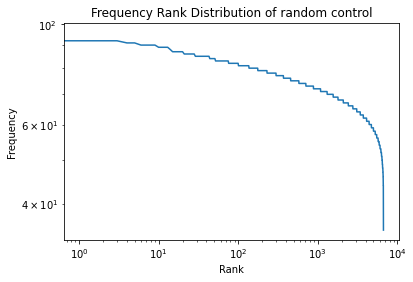

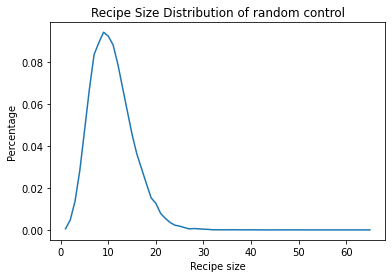

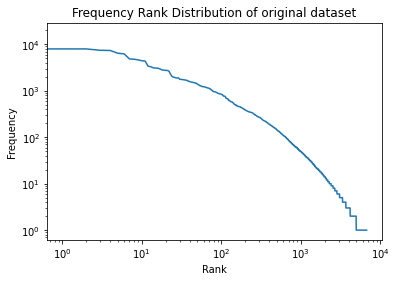

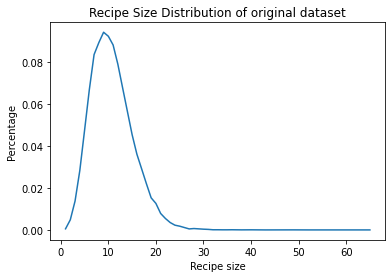

In [204]:
# function to create the random cuisine using strategy 1
def create_RandomCuisine():
  new_df = {'id':[],'cuisine':[],'ingredients':[]}
  for index,row in df.iterrows():
    recipe = row['ingredients']
    recipe_size = len(recipe)
    new_recipe = []
    indices = []

    # for all the ingredient in the recipe choosing one random ingredient from the ingredient basket
    for i in range(recipe_size):
      index = random.randint(0,len(ingredient_basket)-1)
      indices.append(index)
      new_recipe.append(ingredient_basket[index])
      # ensuring without replacement
      ingredient_basket.remove(ingredient_basket[index])

    # appending the new recipe to the cuisine
    new_df['id'].append(row['id'])
    new_df['cuisine'].append(row['cuisine'])
    new_df['ingredients'].append(new_recipe)

    # restoring the ingredient basket
    for i in range(recipe_size):
      ingredient_basket.insert(indices[i],new_recipe[i])
  new_df = pd.DataFrame(new_df)
  plot_frequencyRank(new_df,"Frequency Rank Distribution of random control")
  plot_recipeSize(new_df, "Recipe Size Distribution of random control")
  return new_df

new_df  = create_RandomCuisine()

plot_frequencyRank(df,"Frequency Rank Distribution of original dataset")
plot_recipeSize(df, "Recipe Size Distribution of original dataset")  

Here, we can see that the recipe size distribution is same as the original cuisine but the frequency rank distribution is different.

In [205]:
new_df

,id,cuisine,ingredients
0,3885,italian,"[regular chicken broth, annatto powder, Barill..."
1,13430,brazilian,"[treviso, heirloom squash, organic sugar, past..."
2,13049,mexican,"[gin, green garlic, hot cocoa mix, canned chip..."
3,49282,mexican,"[rum, cabbage, strawberry preserves, royal oli..."
4,2253,indian,"[white beans, dried barberries, ramen noodle s..."
...,...,...,...
39769,12805,japanese,[sugar pea]
39770,39221,italian,[bouillon cube]
39771,10816,greek,[crusty rolls]
39772,39186,thai,[fine salt]


# (b)

The random control is built using the strategy 1 as mentioned in the part (a) also.

All the parameters that are kept constant in (a) are kept constant in (b) too along with preserving the frequency of use of ingredients.

This is done by using weighted probability while sampling the ingredients without replacement in the recipes.

The weighted probability ensures that the ingredient with high frequency is chosen more number of times.

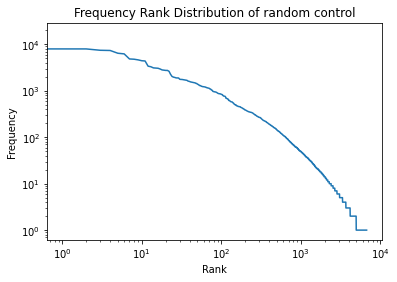

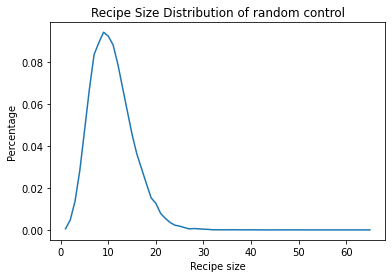

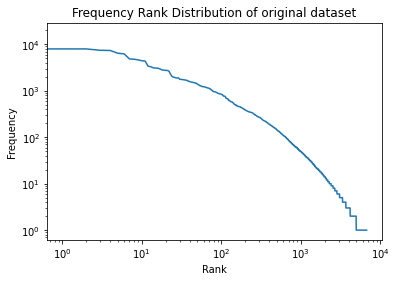

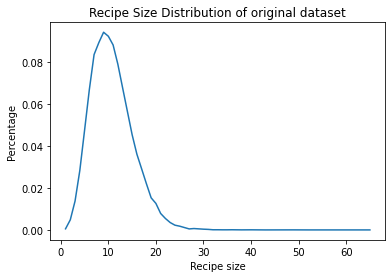

In [206]:
new_df = {'id':[],'cuisine':[],'ingredients':[]}
# iterating over all the recipes
for index,row in df.iterrows():
  size = len(row['ingredients'])
  new_recipe = []
  hell = False

  # sampling ingredients for the recipes using weighted probability
  for i in range(size):
    ingredient = random.choices(ingredient_basket, weights=weighted, k=1)[0]
    index = ingredient_basket.index(ingredient)
    frequency = weighted[index]-1
    if frequency==0:
      weighted.pop(index)
      ingredient_basket.pop(index)
    else:
      weighted[index] = weighted[index]-1
    new_recipe.append(ingredient)
  
  new_df['id'].append(row['id'])
  new_df['cuisine'].append(row['cuisine'])
  new_df['ingredients'].append(new_recipe)

new_df = pd.DataFrame(new_df)
plot_frequencyRank(new_df, "Frequency Rank Distribution of random control")
plot_recipeSize(new_df, "Recipe Size Distribution of random control")
plot_frequencyRank(df,"Frequency Rank Distribution of original dataset")
plot_recipeSize(df, "Recipe Size Distribution of original dataset")  

Here, both the plots are exactly same to each other.

In [208]:
new_df

,id,cuisine,ingredients
0,3885,italian,"[salt, white sugar, ground coriander, long-gra..."
1,13430,brazilian,"[milk, purple onion, confectioners sugar, oran..."
2,13049,mexican,"[cheese tortellini, roasted garlic, milk, grou..."
3,49282,mexican,"[spicy brown mustard, salted dry roasted peanu..."
4,2253,indian,"[long grain and wild rice mix, butter, milk, s..."
...,...,...,...
39769,12805,japanese,[double cream]
39770,39221,italian,[rice]
39771,10816,greek,[cornbread]
39772,39186,thai,[dry mustard]
